In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:
# Veri Okuma
df = pd.read_csv("C:\\Users\\yunus\\Desktop\\Proje Fikirleri\\anomali-tespiti\\data\\raw\\cicids2017_sample_cleaned.csv")

In [6]:
df.head()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Label
0,131958,823,1251,56947,24345,BENIGN
1,156867,518,948,30306,51176,BENIGN
2,141932,476,381,88699,52219,BENIGN
3,375838,709,460,41821,27403,BENIGN
4,269178,771,1031,65595,36488,BENIGN


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Flow Duration                1000 non-null   int64 
 1   Total Fwd Packets            1000 non-null   int64 
 2   Total Backward Packets       1000 non-null   int64 
 3   Total Length of Fwd Packets  1000 non-null   int64 
 4   Total Length of Bwd Packets  1000 non-null   int64 
 5   Label                        1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


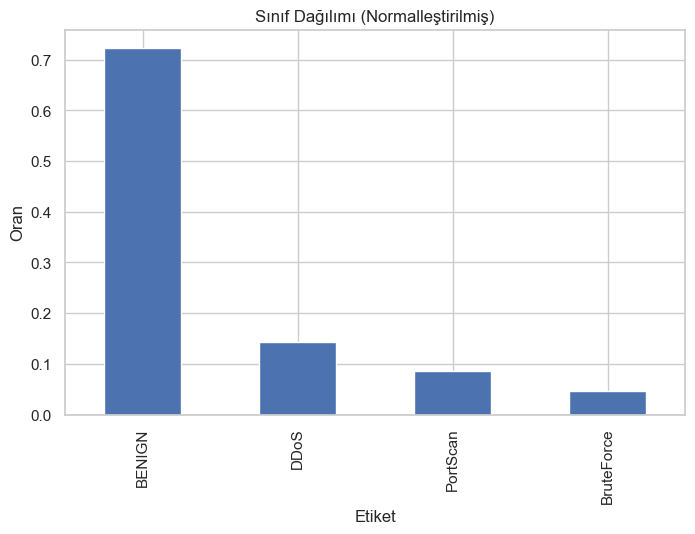

In [8]:
plt.figure(figsize=(8, 5))
df['Label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Sınıf Dağılımı (Normalleştirilmiş)')
plt.ylabel('Oran')
plt.xlabel('Etiket')
plt.show()


In [9]:
# Hangi sütunda kaç tane eksik değer var?
df.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Label                          0
dtype: int64

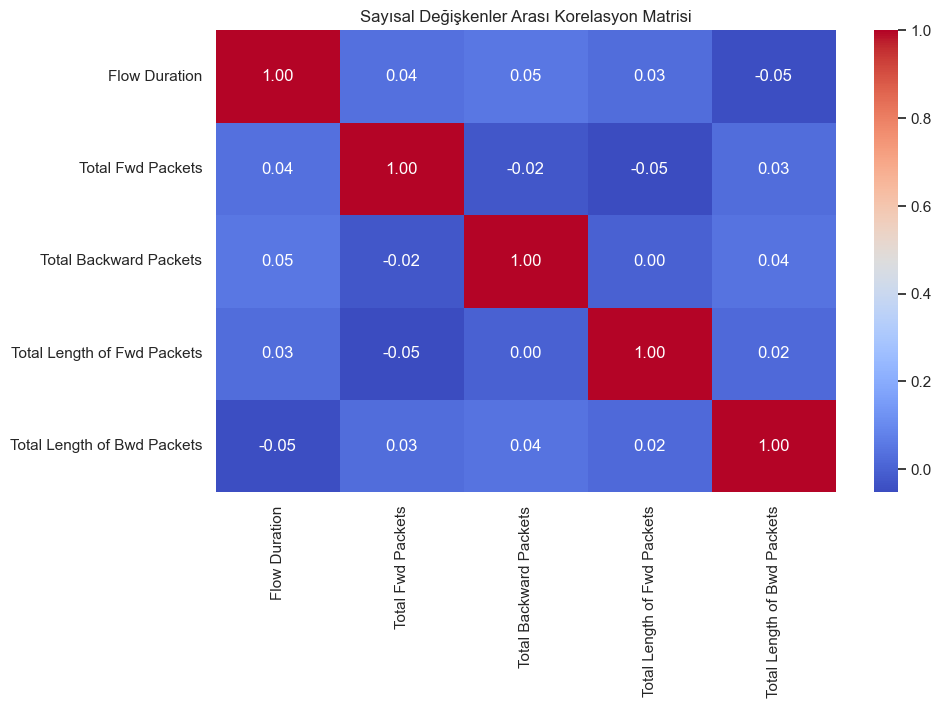

In [10]:
# Sayısal değişkenlerin korelasyonunu al
corr = df.corr(numeric_only=True)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()


In [11]:
df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,249665.953000,745.926000,747.979000,48652.522000,39038.463000
std,142841.533943,442.054133,428.373917,29077.606845,22818.626814
min,10404.000000,1.000000,2.000000,638.000000,412.000000
25%,129059.250000,355.250000,382.750000,22464.000000,19873.750000
50%,239402.500000,761.000000,750.500000,48985.500000,37542.500000
75%,374877.750000,1134.000000,1110.500000,74401.000000,58574.750000
max,499570.000000,1498.000000,1497.000000,99791.000000,79998.000000


Veri Ön İşleme

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Label_encoded'] = le.fit_transform(df['Label'])

# Dönüştürülmüş etiketler
df[['Label', 'Label_encoded']].drop_duplicates()


,Label,Label_encoded
0,BENIGN,0
6,PortScan,3
12,DDoS,2
49,BruteForce,1


In [14]:
from sklearn.preprocessing import StandardScaler

features = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets'
]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Etiket sütununu ekleme
df_scaled['Label'] = df['Label_encoded']
